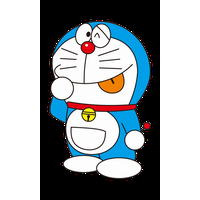

Height: 200, Width: 200, Channels: 3


In [1]:
import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread('doraemon.png')

dimensions = image.shape
height, width, channels = dimensions

cv2_imshow(image)

print(f"Height: {height}, Width: {width}, Channels: {channels}")



In [2]:
import os
import time


file_size = os.path.getsize('doraemon.png')

mod_time = os.path.getmtime('doraemon.png')
mod_date = time.ctime(mod_time)

bit_depth = image.dtype


print(f"File Size: {file_size} bytes")
print(f"Last Modified Date: {mod_date}")
print(f"Bit Depth: {bit_depth}")
print(f"Image Dimensions: {height}x{width} pixels")


File Size: 26183 bytes
Last Modified Date: Wed Oct  9 17:56:17 2024
Bit Depth: uint8
Image Dimensions: 200x200 pixels


Displaying the original image:


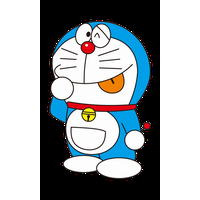

Displaying the modified uint8 image (after clipping):


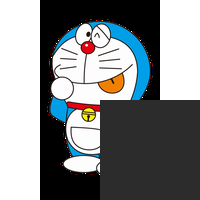

In [4]:

import numpy as np


double_image = image.astype(np.float64)


double_image[100:200, 100:200] = 300  # Set a region to values > 255
double_image[200:300, 200:300] = -50  # Set a region to values < 0


uint8_image = double_image.astype(np.uint8)


print("Displaying the original image:")
cv2_imshow(image)

print("Displaying the modified uint8 image (after clipping):")
cv2_imshow(uint8_image)



Original Image:


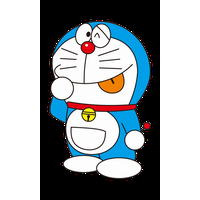

Binarized Image:


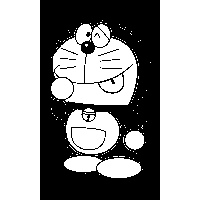

In [5]:
import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread('doraemon.png')

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, binarized_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

print("Original Image:")
cv2_imshow(image)

print("Binarized Image:")
cv2_imshow(binarized_image)


The image is a three-channel image with size (200, 200, 3)
Grayscale Image:


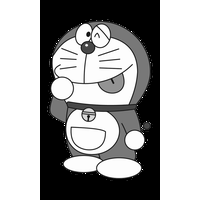

Binarized Image:


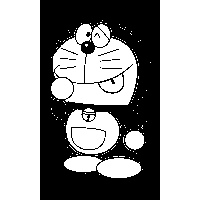

In [6]:
import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread('doraemon.png')

channels = image.shape[2] if len(image.shape) == 3 else 1
image_size = image.shape

if channels == 3:
    print(f"The image is a three-channel image with size {image_size}")

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    _, binarized_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

    print("Grayscale Image:")
    cv2_imshow(gray_image)
    print("Binarized Image:")
    cv2_imshow(binarized_image)

else:
    print(f"The image is a one-channel (grayscale) image with size {image_size}")
    cv2_imshow(image)


Grayscale Image:


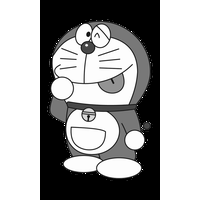

Binarized Image (Manual Implementation):


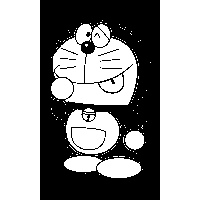

In [7]:
image = cv2.imread('doraemon.png')

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
threshold = 127
binarized_image = np.zeros_like(gray_image)
height, width = gray_image.shape

for i in range(height):
    for j in range(width):
        if gray_image[i, j] > threshold:
            binarized_image[i, j] = 255
        else:
            binarized_image[i, j] = 0
print("Grayscale Image:")
cv2_imshow(gray_image)
print("Binarized Image (Manual Implementation):")
cv2_imshow(binarized_image)


<IPython.core.display.Javascript object>

Grayscale Image:


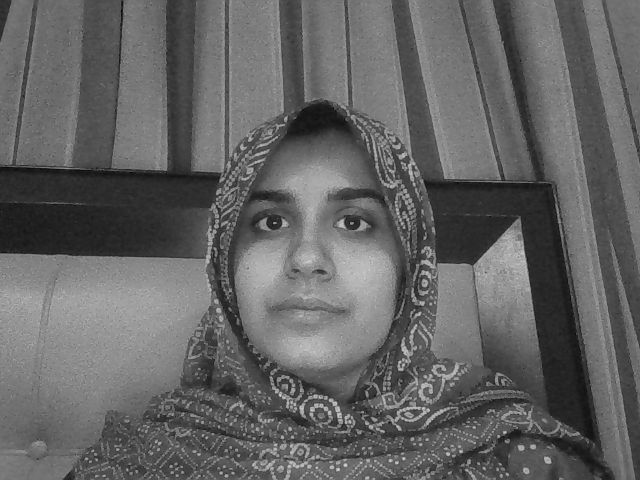

In [3]:


import cv2
import numpy as np
import threading
from google.colab.output import eval_js
from IPython.display import display, Javascript
from google.colab.patches import cv2_imshow
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture Photo';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      video.srcObject = stream;
      video.play();

      // Resize the output video to fit the browser window
      video.width = 320;
      video.height = 240;

      // Add the video to the div
      div.appendChild(video);

      // Wait for the user to click the capture button
      await new Promise((resolve) => capture.onclick = resolve);

      // Take the photo
      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);

      // Stop the video stream
      stream.getVideoTracks()[0].stop();
      div.remove();

      // Return the image data
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])

    # Write the image to a file
    with open(filename, 'wb') as f:
        f.write(binary)

    return filename

# Capture a photo
filename = take_photo()

# Read the image using OpenCV
image = cv2.imread(filename)

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
print("Grayscale Image:")
cv2_imshow(gray_image)
